In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
name = "gsm8k_fft_full_constantlr"

checkpoints2 = [311, 934, 1557, 3110]
full_accs = []


for checkpoint in checkpoints2:
   answer_types_all = np.load(f"../ckpts/{name}/checkpoint-{str(checkpoint)}/train_answer_types.npy")
   acc = (answer_types_all==0)
#    print(acc)
   full_accs.append(acc)
   
full_accs = np.array(full_accs)

In [3]:
full_accs.shape

(4, 7473, 100)

In [4]:
full_rouges = []

rouge_type = "rougeL"

for checkpoint in checkpoints2:
   rouge_dict = np.load(f"../ckpts/{name}/checkpoint-{str(checkpoint)}/train_rouge.npy", allow_pickle=True).item()
   full_rouges.append(rouge_dict[rouge_type])
   
full_rouges = np.array(full_rouges)

In [5]:
full_rouges.shape

(4, 7473, 100)

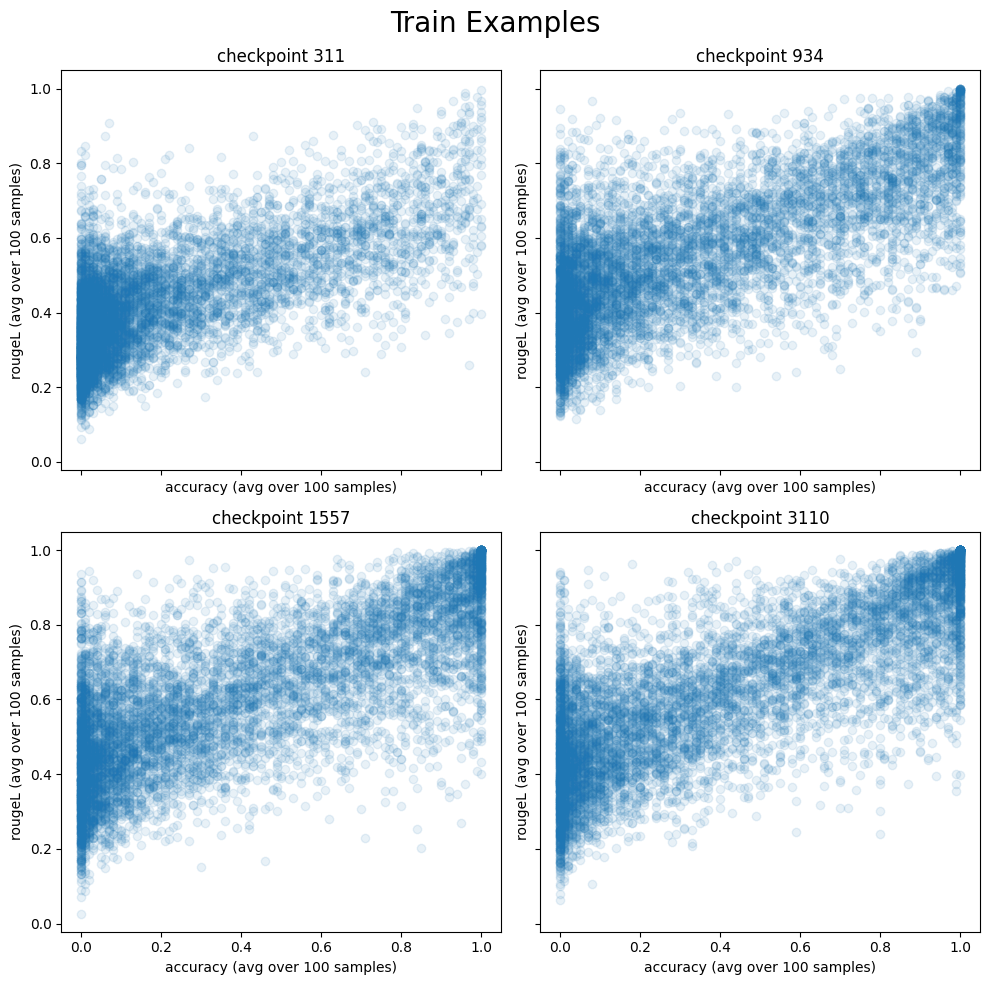

In [13]:
# make 4 subplots

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for i in range(4):
    ax = axs[i//2, i%2]
    ax.scatter(full_accs[i].mean(axis=-1), full_rouges[i].mean(axis=-1), alpha=0.1)
    ax.set_title(f"checkpoint {checkpoints2[i]}")
    ax.set_xlabel("accuracy (avg over 100 samples)")
    ax.set_ylabel(f"{rouge_type} (avg over 100 samples)")

# make overall title
fig.suptitle(f"Train Examples", fontsize=20)

# make lower
fig.tight_layout()

In [18]:
def get_example_type(acc, rouge, rouge_thresh=0.9):
    acc= np.array(acc)
    rouge = np.array(rouge)
    
    correct_memorized = (acc==1) & (rouge>rouge_thresh)
    correct_not_memorized = (acc==1) & (rouge<=rouge_thresh)
    incorrect_memorized = (acc==0) & (rouge>rouge_thresh)
    incorrect_not_memorized = (acc==0) & (rouge<=rouge_thresh)
    
    assert np.sum(correct_memorized) + np.sum(correct_not_memorized) + np.sum(incorrect_memorized) + np.sum(incorrect_not_memorized) == len(acc)
    return np.sum(correct_memorized), np.sum(correct_not_memorized), np.sum(incorrect_memorized), np.sum(incorrect_not_memorized)

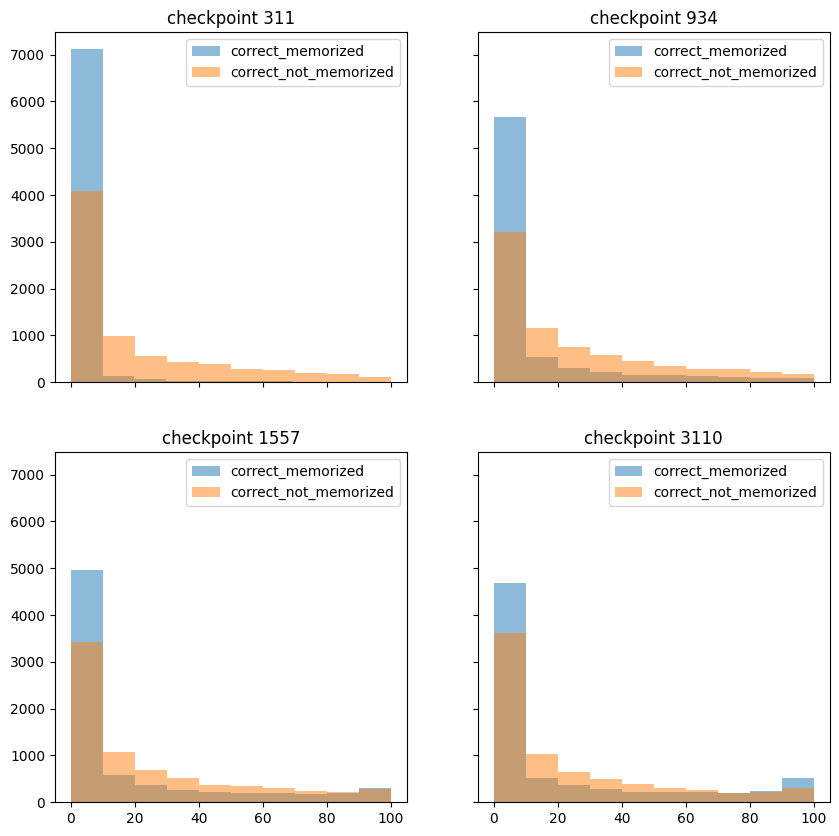

In [21]:
# make 4 subplots

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for i in range(4):
    ax = axs[i//2, i%2]
    correct_memorized_all = []
    correct_not_memorized_all = []
    incorrect_memorized_all = []
    incorrect_not_memorized_all = []
    for example_idx in range(7473):
        correct_memorized, correct_not_memorized, incorrect_memorized, incorrect_not_memorized = get_example_type(full_accs[i][example_idx], full_rouges[i][example_idx])
        correct_memorized_all.append(correct_memorized)
        correct_not_memorized_all.append(correct_not_memorized)
        incorrect_memorized_all.append(incorrect_memorized)
        incorrect_not_memorized_all.append(incorrect_not_memorized)
    
    ax.hist(correct_memorized_all, alpha=0.5, label="correct_memorized")
    ax.hist(correct_not_memorized_all, alpha=0.5, label="correct_not_memorized")
    # ax.hist(incorrect_memorized_all, alpha=0.5, label="incorrect_memorized")
    # ax.hist(incorrect_not_memorized_all, alpha=0.5, label="incorrect_not_memorized")
    ax.set_title(f"checkpoint {checkpoints2[i]}")
    ax.legend()
    # ax.set_xlabel("accuracy (avg over 100 samples)")
    # ax.set_ylabel(f"{rouge_type} (avg over 100 samples)")

# # make overall title
# fig.suptitle(f"Train Examples", fontsize=20)

# # make lower
# fig.tight_layout()

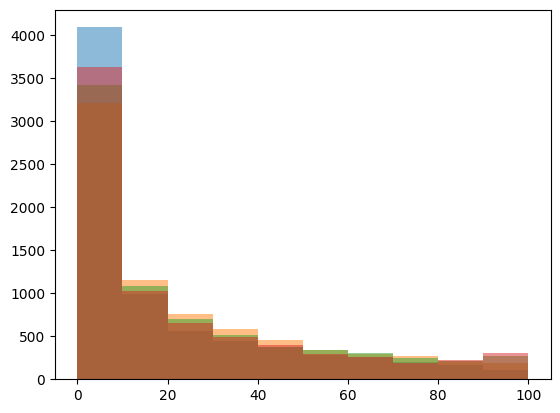

In [48]:

for i in range(4):
    correct_memorized_all = []
    correct_not_memorized_all = []
    incorrect_memorized_all = []
    incorrect_not_memorized_all = []
    for example_idx in range(7473):
        correct_memorized, correct_not_memorized, incorrect_memorized, incorrect_not_memorized = get_example_type(full_accs[i][example_idx], full_rouges[i][example_idx])
        correct_memorized_all.append(correct_memorized)
        correct_not_memorized_all.append(correct_not_memorized)
        incorrect_memorized_all.append(incorrect_memorized)
        incorrect_not_memorized_all.append(incorrect_not_memorized)
    
    # ax.hist(correct_memorized_all, alpha=0.5, label="correct_memorized")
    plt.hist(correct_not_memorized_all, alpha=0.5, label="correct_not_memorized")
    # ax.hist(incorrect_memorized_all, alpha=0.5, label="incorrect_memorized")
    # ax.hist(incorrect_not_memorized_all, alpha=0.5, label="incorrect_not_memorized")
    # ax.set_title(f"checkpoint {checkpoints2[i]}")
    # ax.legend()
    # ax.set_xlabel("accuracy (avg over 100 samples)")
    # ax.set_ylabel(f"{rouge_type} (avg over 100 samples)")

# # make overall title
# fig.suptitle(f"Train Examples", fontsize=20)

# # make lower
# fig.tight_layout()

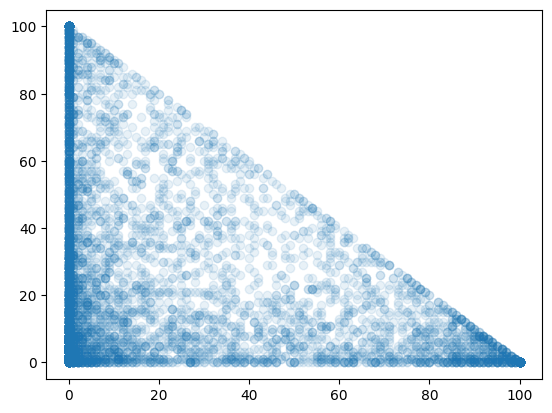

In [55]:
plt.scatter(correct_memorized_all, correct_not_memorized_all, alpha=0.1)

/tmp/ipykernel_22431/4124238190.py:1: RuntimeWarning: invalid value encountered in divide
  plt.hist(np.array(correct_memorized_all)/(np.array(correct_memorized_all)+np.array(correct_not_memorized_all)))


(array([3293.,  312.,  317.,  253.,  224.,  262.,  223.,  300.,  371.,
        1271.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

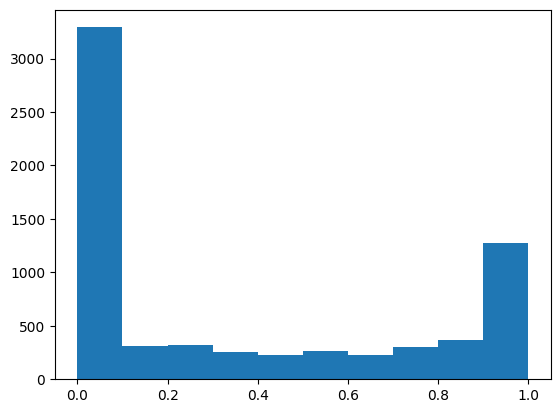

In [59]:
plt.hist(np.array(correct_memorized_all)/(np.array(correct_memorized_all)+np.array(correct_not_memorized_all)))

In [51]:
(np.array(correct_not_memorized_all)>0).mean()

0.8251037066773719

In [22]:
full_rouges.shape

(4, 7473, 100)

In [23]:
score1 = full_rouges.mean(axis=-1).mean(axis=0)

score2 = (full_rouges>0.9).mean(axis=-1).mean(axis=0)

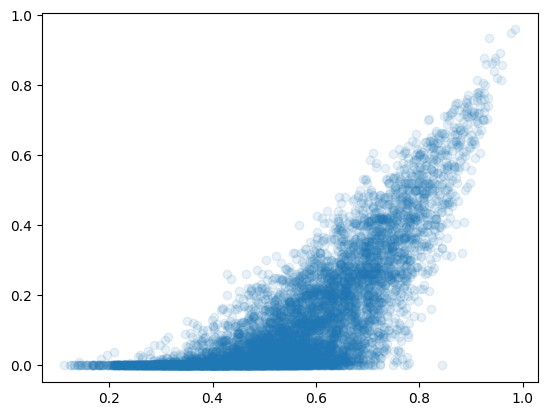

In [26]:
plt.scatter(score1, score2, alpha=0.1)

(array([4478.,  987.,  815.,  451.,  340.,  200.,  120.,   60.,   14.,
           8.]),
 array([0.   , 0.096, 0.192, 0.288, 0.384, 0.48 , 0.576, 0.672, 0.768,
        0.864, 0.96 ]),
 <BarContainer object of 10 artists>)

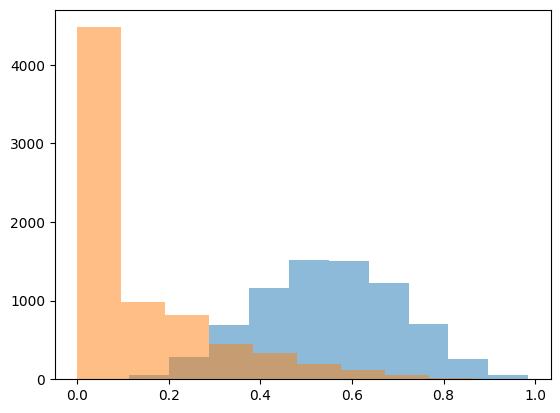

In [27]:
plt.hist(score1, alpha=0.5, label="score1")
plt.hist(score2, alpha=0.5, label="score2")

In [53]:
len(np.where(score2>0.2)[0])/len(score2)

0.25558677907132343

In [30]:
answers_all = np.load(f"../ckpts/{name}/checkpoint-{str(311)}/train_answers.npy")

In [31]:
full_rouges[0]

array([[1.        , 1.        , 1.        , ..., 0.49382716, 0.43333333,
        0.61538462],
       [0.27027027, 0.27027027, 0.27027027, ..., 0.4       , 0.30434783,
        0.24489796],
       [0.33333333, 0.325     , 0.325     , ..., 0.26356589, 0.28282828,
        0.20437956],
       ...,
       [0.27722772, 0.27722772, 0.38095238, ..., 0.20512821, 0.27102804,
        0.2907489 ],
       [0.68235294, 0.56842105, 0.58695652, ..., 0.08870968, 0.31884058,
        0.12711864],
       [0.448     , 0.41860465, 0.40625   , ..., 0.29787234, 0.37179487,
        0.25641026]])

In [32]:
answers_all.shape

(7473, 100)

In [35]:
from datasets import load_dataset

dataset = load_dataset("gsm8k", "main")

train_answers = np.array(dataset["train"]['answer'])

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
# example_idx = 10
for example_idx in range(1, 7473):
    for sample_i in np.where(full_rouges[0][example_idx]> 0.9)[0]:
        print(full_rouges[0][example_idx][sample_i])
        print(train_answers[example_idx])
        print(answers_all[example_idx][sample_i])
        print()

0.9743589743589743
He writes each friend 3*2=<<3*2=6>>6 pages a week
So he writes 6*2=<<6*2=12>>12 pages every week
That means he writes 12*52=<<12*52=624>>624 pages a year
#### 624
He writes each friend 3*2=<<3*2=6>>6 pages a week
So he writes 6*2=<<6*2=12>>12 pages a week
That means he writes 12*52=<<12*52=624>>624 pages a year
#### 624

0.935064935064935
He writes each friend 3*2=<<3*2=6>>6 pages a week
So he writes 6*2=<<6*2=12>>12 pages every week
That means he writes 12*52=<<12*52=624>>624 pages a year
#### 624
Each friend gets 3*2=<<3*2=6>>6 pages a week
So he writes 6*2=<<6*2=12>>12 pages a week
That means he writes 12*52=<<12*52=624>>624 pages a year
#### 624

0.9230769230769231
He writes each friend 3*2=<<3*2=6>>6 pages a week
So he writes 6*2=<<6*2=12>>12 pages every week
That means he writes 12*52=<<12*52=624>>624 pages a year
#### 624
James writes each friend 3*2=<<3*2=6>>6 pages a week
So he writes 2*6=<<2*6=12>>12 pages a week
That means he writes 12*52=<<12*52=624>>624 